In [2]:
import matplotlib.pyplot as plt, numpy as np, seaborn as sns, scipy.stats as stats, pandas as pd, os, glob
import ast
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## plotting cursor

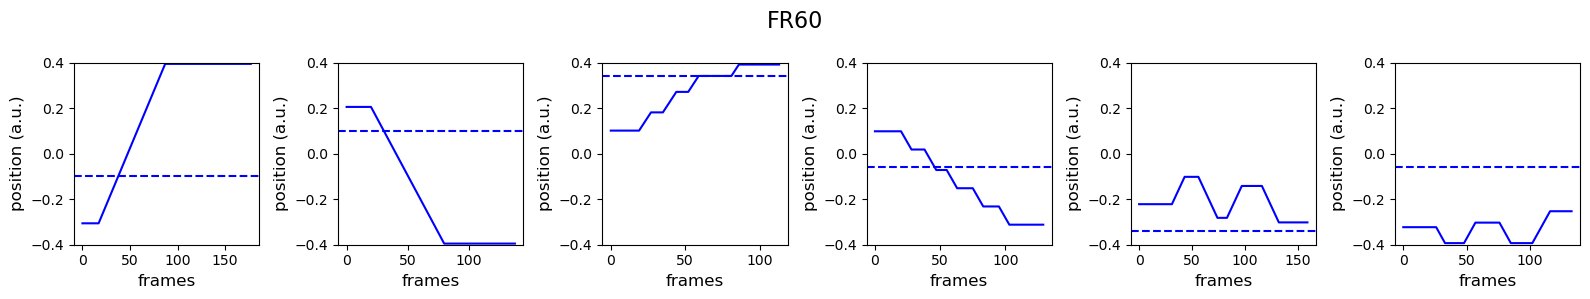

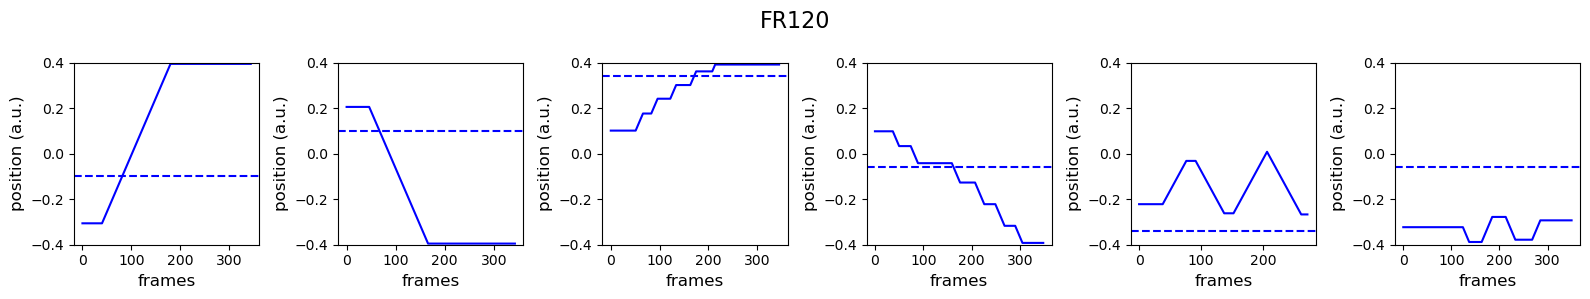

In [12]:
for subj in ['FR60', 'FR120']:
    df = pd.read_csv(glob.glob(f'../results/*{subj}*.csv')[0])

    fig, axs = plt.subplots(1, 6, figsize=(16, 3))
    axs = axs.flatten()
    fig.suptitle(f'{subj}', fontsize=16)

    for i in range(len(df)):

        ax = axs[i]
        ax.plot(eval(df['positions'].iloc[i]), color='blue')
        ax.set_ylim(-.4, .4)
        ax.axhline(y=df['target_pos'].iloc[i], color='blue', linestyle='--')
        ax.set_xlabel('frames', fontsize=12)
        ax.set_ylabel('position (a.u.)', fontsize=12)

    plt.tight_layout()
    plt.show()

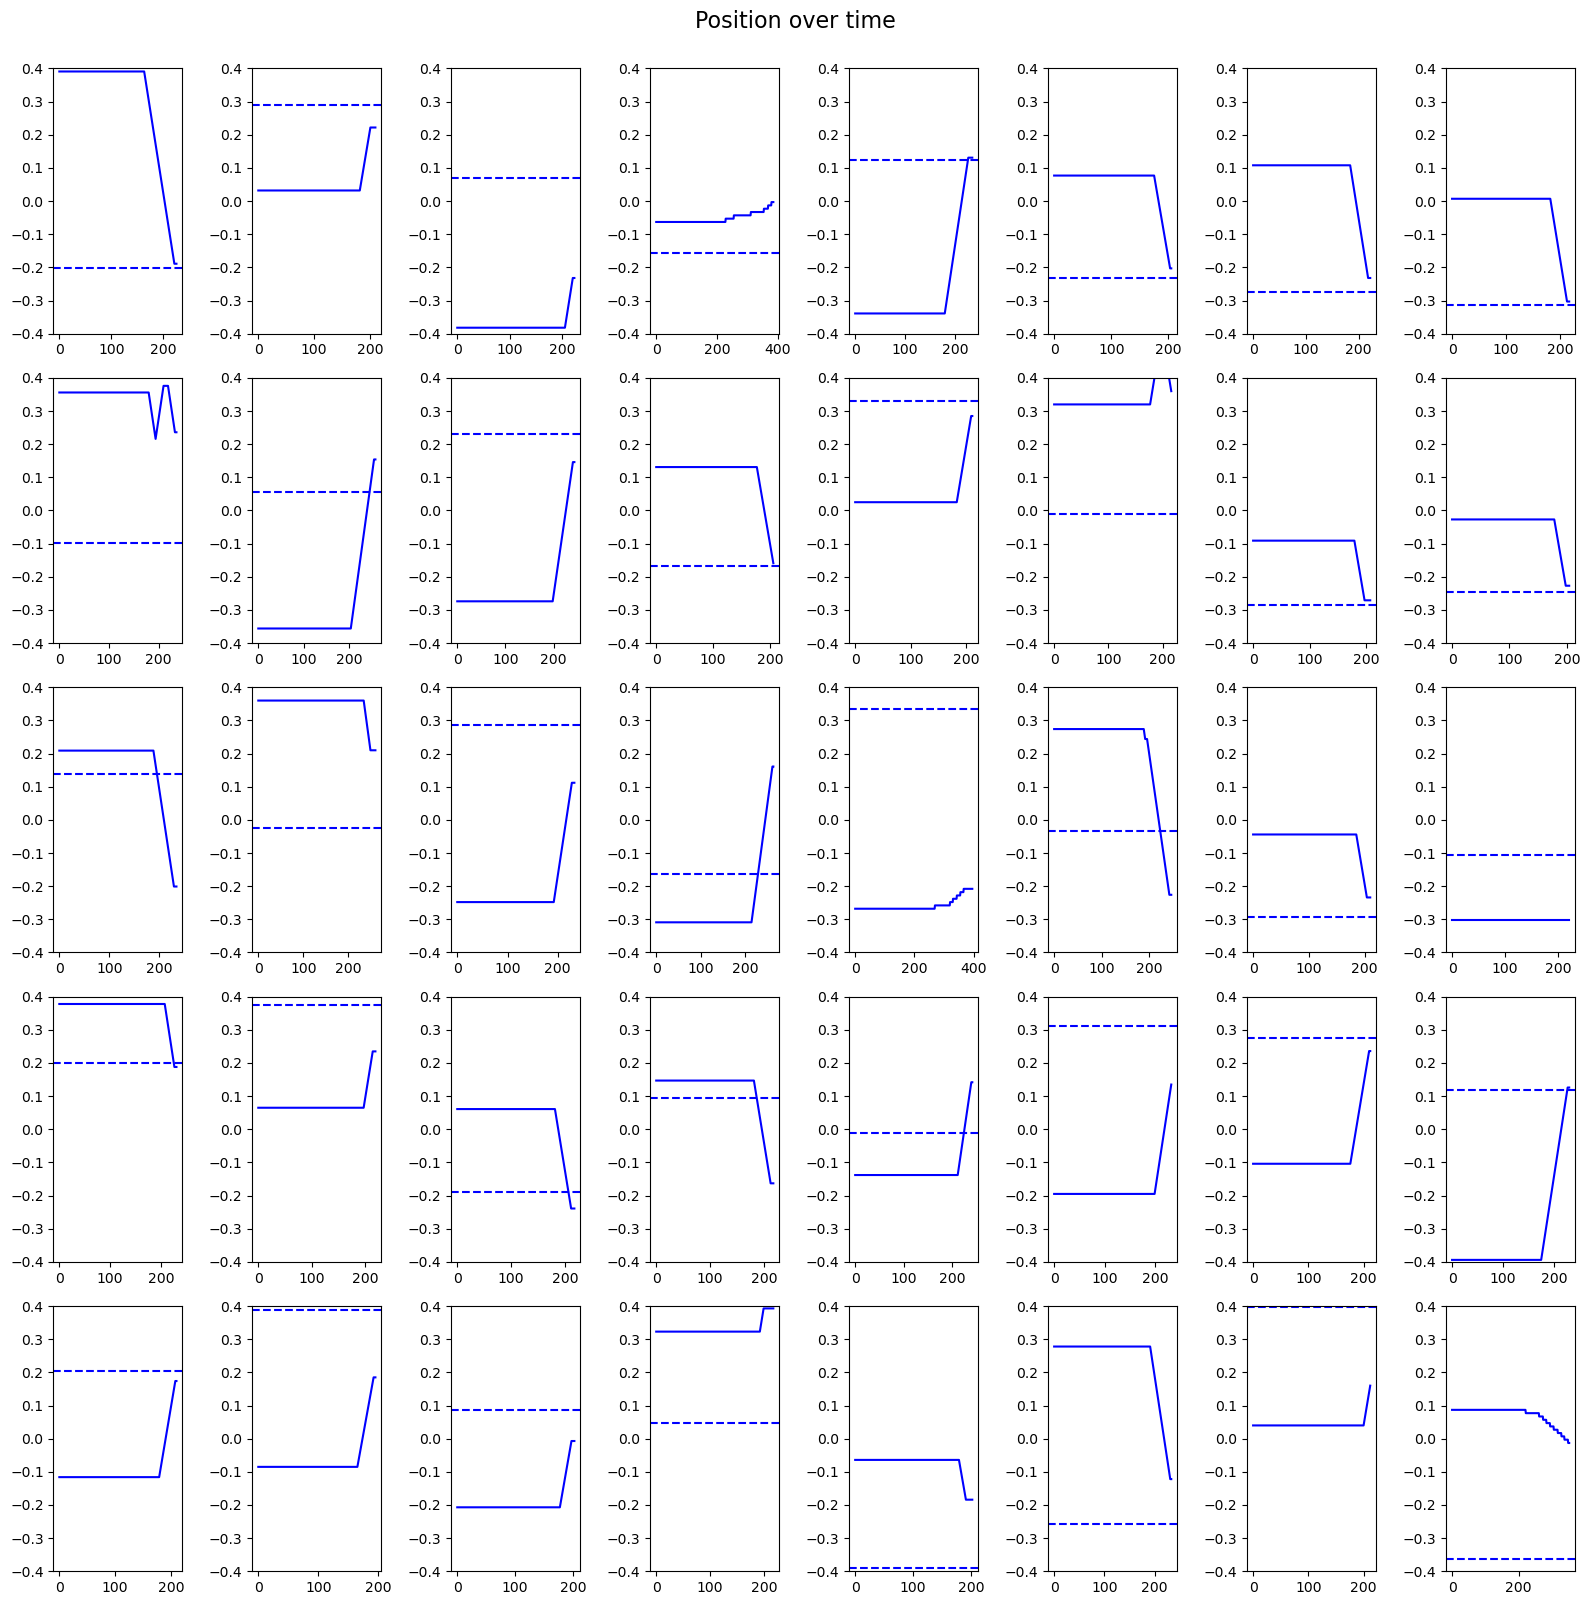

In [29]:
df = pd.read_csv(glob.glob('../results/*tomas*.csv')[0])

fig, axs = plt.subplots(5, 8, figsize=(16, 16))
axs = axs.flatten()
fig.suptitle('Position over time', fontsize=16, y=1.0)

for i in range(40):

    ax = axs[i]
    ax.plot(eval(df['positions'].iloc[i]), color='blue')
    ax.set_ylim(-.4, .4)
    ax.axhline(y=df['target'].iloc[i], color='blue', linestyle='--')

plt.tight_layout()
plt.show()

## checking if delay period is correct

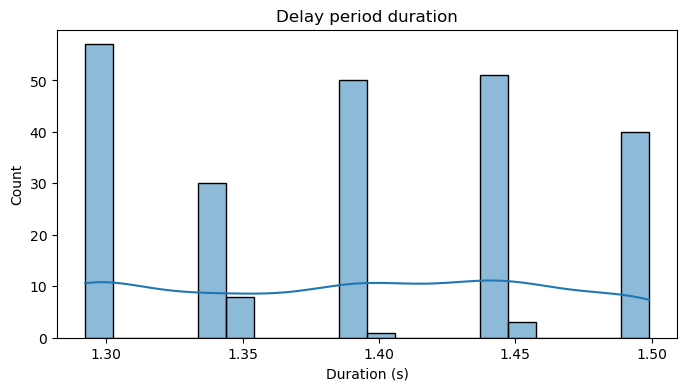

correct
1.0    206
0.0     34
Name: count, dtype: int64

In [16]:
df = pd.read_csv(glob.glob('../results/*arnav*.csv')[0])
df['delay_period'] = df['delay.stopped'] - df['delay.started']

# plot hist
plt.figure(figsize=(8, 4))
sns.histplot(df['delay_period'], bins=20, kde=True)
plt.title('Delay period duration')
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.show()

df['correct'].value_counts(normalize=False)

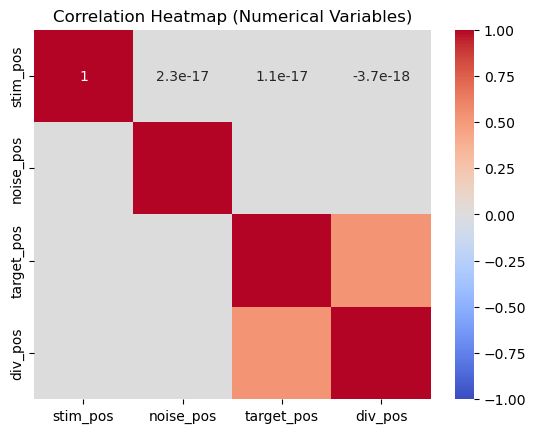

In [17]:
corr = df[['stim_pos', 'noise_pos', 'target_pos', 'div_pos']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Numerical Variables)")
plt.show()

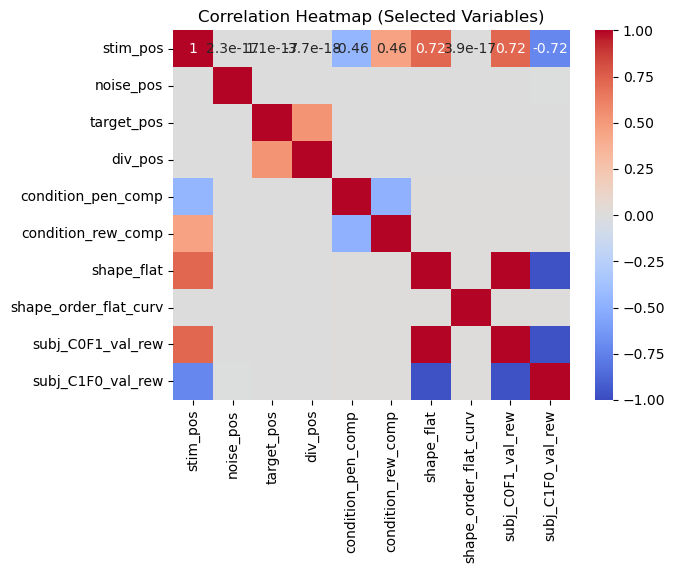

In [18]:
# Select only the specified columns
cols = ['condition', 'shape', 'shape_order', 'subj_C0F1_val', 'subj_C1F0_val', 
        'stim_pos', 'noise_pos', 'target_pos', 'div_pos']

df_selected = df[cols]

# Convert categorical columns to numerical (one-hot encoding)
df_encoded = pd.get_dummies(df_selected, drop_first=True)

# Compute correlation matrix
corr = df_encoded.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Selected Variables)")
plt.show()